# Assignment 1 - Aditya Jhaveri - N13689134 - aaj6301

## Information Theory

Q(a): is 𝐇(x|y) = 𝐇(y|x) ?

A(a):

Since, we know that Conditional Entropy's equation is:

$$
𝐇(X | Y) = ∑_{y ∈ 𝒀}∑_{x ∈ 𝑿} p(x, y) log\frac{1}{p(x | y)}
$$

Similarly:
$$
𝐇(Y | X) = ∑_{x ∈ 𝐗}∑_{y ∈ 𝐘} p(x, y) log\frac{1}{p(y | x)}
$$

Here is the python code to do the required calculations:


In [4]:
import numpy as np
import progressbar
import matplotlib.pyplot as plt

# Given joint probability table
P_XY = np.array([
    [1/8, 1/16, 1/32, 1/32],
    [1/16, 1/8, 1/32, 1/32],
    [1/16, 1/16, 1/16, 1/16],
    [1/4, 0, 0, 0]
])
# Compute marginal probabilities
P_X = np.sum(P_XY, axis=0)  # P(Y=y)
print("P(X) = " + str(P_X))
P_Y = np.sum(P_XY, axis=1)  # P(X=x)
print("P(Y) = " + str(P_Y))

# H(Y|X)
H_Y_X = 0

# H(X|Y)
H_X_Y = 0

for x in range(4):
  sum = 0
  for y in range(4):
    if P_XY[y, x] != 0:
      sum = sum + P_XY[y, x]*(np.log2(P_X[x]/P_XY[y, x]))
  H_Y_X = H_Y_X + sum

for y in range(4):
  sum = 0
  for x in range(4):
    if P_XY[y, x] != 0:
      sum = sum + P_XY[y, x]*(np.log2(P_Y[y]/P_XY[y, x]))
  H_X_Y = H_X_Y + sum


print("H(Y|X) = " + str(H_Y_X))
print("H(X|Y) = " + str(H_X_Y))


P(X) = [0.5   0.25  0.125 0.125]
P(Y) = [0.25 0.25 0.25 0.25]
H(Y|X) = 1.625
H(X|Y) = 1.375


Hence, we can say that, according ot the given data:

$$
𝐇(𝐗 | 𝐘) \neq 𝐇(𝐘 | 𝐗)
$$

Q(b)
Is 𝐇(X) - 𝐇(X | Y) = 𝐇(Y) - 𝐇(Y | X) ?

In [7]:
# Q(b)

# H(X)
H_X = 0

# H(Y)
H_Y = 0

for x in range(4):
  H_X = H_X + P_X[x]*np.log2(1/P_X[x])

for y in range(4):
  H_Y = H_Y + P_Y[y]*np.log2(1/P_Y[y])

print("H(X) = " + str(H_X))
print("H(Y) = " + str(H_Y))

print("H(X) - H(X|Y) = " + str(H_X - H_X_Y))
print("H(Y) - H(Y|X) = " + str(H_Y - H_Y_X))

H(X) = 1.75
H(Y) = 2.0
H(X) - H(X|Y) = 0.375
H(Y) - H(Y|X) = 0.375


Hence we can prove that:

$$
  H(X) - H(X | Y) = H(Y) - H(Y | X)
$$

Q(C) Calculate the mutual information 𝐈(X; Y)

From the given equation we can see that:

𝐈(X; Y) = 𝐇(X) - 𝐇(X|Y) = 𝐇(Y) - 𝐇(Y|X) = 0.375 (As calculated in answer b.)

## Maximum Likelihood Parameter Estimation

The probability density function of an exponential distribution is:

$$
f(x; \lambda) =
\begin{cases}
\lambda e^{-\lambda x} & x \geq 0, \\
0 & x < 0.
\end{cases}
$$

Here λ > 0 is the parameter of the distribution, often called the rate parameter.

### Task 1: Simulate interarrival times

In [13]:
def simulate(rate, num_samples):
    return np.random.exponential(scale=1/rate, size=num_samples)

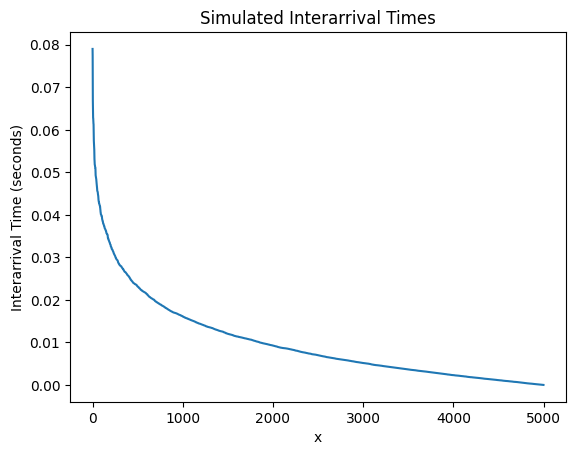

In [26]:
# Parameters
rate = 100  # True rate parameter to generate data
num_samples = 5000  # Number of samples to generate
data = simulate(rate, num_samples)
plt.plot(np.arange(num_samples), sorted(data, reverse=True))
plt.xlabel("x")
plt.ylabel("Interarrival Time (seconds)")
plt.title("Simulated Interarrival Times")
plt.show()

### Task 2: SGD for parameter estimation

Here we will define the Negative Log Likelihood function:

We can see that the negative log-likelihood function for the exponential distribution is:
$$
𝓛(λ) = - \sum_{i = 1}^{n}(log(λ) - λx_i)
$$

Hence, we can find the gradient of the NLL w.r.t λ as follows:
$$
  \frac{∂ 𝓛}{∂ λ} = - \sum_{i = 1}^{n}(\frac{1}{λ} - x_i)
$$

This gradient will be used to update the rate parameter λ.

In [19]:
def NLL(lambda_, data):
    return -np.sum(np.log(lambda_) - lambda_ * data)

In [20]:
def SGD_EXP(data, learning_rate=0.01, num_iterations=1000):
    # Initialize lambda
    lambda_est = 1.0
    n = len(data)
    objective_values = []

    for i in range(num_iterations):
        # Shuffle data for SGD
        np.random.shuffle(data)

        # Iterate over mini-batches (here, single data point for true SGD)
        for x in data:
            gradient = -(1/lambda_est - x)  # Gradient of negative log-likelihood
            lambda_est -= learning_rate * gradient  # Update lambda

        # Store objective value for plotting
        objective_values.append(NLL(lambda_est, data))

    return lambda_est, objective_values

Estimated lambda: 100.95434857042287


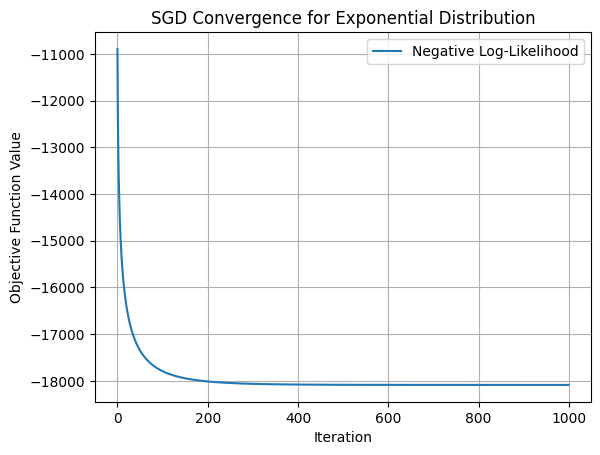

In [27]:
# Parameters
learning_rate = 0.01  # Learning rate for SGD
num_iterations = 1000  # Number of SGD iterations

# Simulate data
data = simulate(rate, num_samples)

# Run SGD
lambda_est, objective_values = SGD_EXP(data, learning_rate, num_iterations)

# Output results
print(f"Estimated lambda: {lambda_est}")

# Plot objective function over iterations
plt.plot(range(num_iterations), objective_values, label="Negative Log-Likelihood")
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("SGD Convergence for Exponential Distribution")
plt.legend()
plt.grid()
plt.show()

## Linear Regression and SGD

In [28]:
np.random.seed(1234)

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

In [42]:
x_train, y_train = create_toy_data(sinusoidal, 100, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

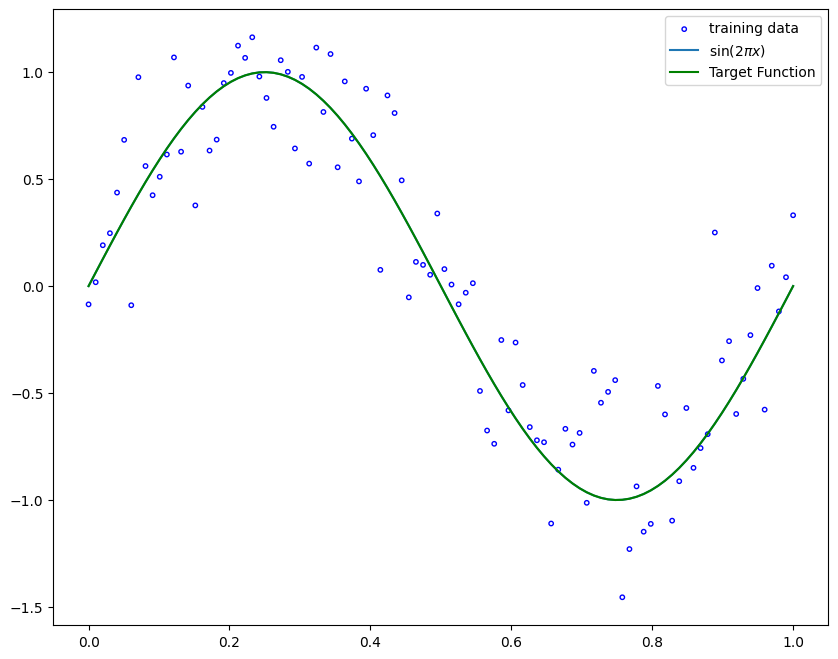

In [43]:
plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=10, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.plot(x_test, y_test, "-g", label="Target Function")
plt.legend()
plt.show()

Let us first right down the equations of Mean Sqauared Error with L2 Regularization:

$$
  L(w) = \frac{1}{m}(\sum_{i=1}^{m}(g(w, x_i) - w_i)^2) + \frac{\lambda}{m}||w||^2
$$

Where we can see that:

### Hypothesis:
$$
  g(w, x_i) = b + w_1 x_i + w_2 x_i^2 + \dots + w_n x_i^n
$$
- g(w, x<sub>i</sub>): Predicted Value
- b: Bias
- w<sub>1</sub>, w<sub>2</sub>, ... , w<sub>n</sub>: Features/Weights

$$
  g(w, x_i) = b + \sum_{j=1}^{n}w_j x^j_i
$$

`n`: Polynomial Degree \
`m`: Training example size \
`λ`: Regularization Parameter \

---

Differentiating w.r.t `w` and `b` gives us the gradient.

### Gradient:

This gradient will be used to update the weight vector w:

$$
  \frac{∂J}{∂w} = \frac{2}{m}\sum_{i=0}^{n}(g(w, x) - y^i)x^i + \frac{2λ}{m}w
$$

This gradient will be used to update the bias:
$$
  \frac{∂J}{∂b} = \frac{2}{m}\sum_{i=0}^{n}(g(w, x) - y^i)
$$

The gradients will be used to keep on updating the weights and bias each epoch:

$$
  w_{t+1} = w_{t} - α(\frac{∂J}{∂w_{t}})
$$

$$
  b_{t+1} = b_{t} - α(\frac{∂J}{∂b_{t}})
$$

where `t` is each epoch and `α` is the learning rate and **w<sub>t</sub>** and **b<sub>t</sub>** mean the appropriate weight vector and bias at epoch `t`.

---

In [75]:
def generate_polynomial(x, degree):
    rows = []
    for i in range(len(x)):
        row = []
        # row = [1]
        for j in range(1, degree + 1):
            row.append(x[i] ** j)
        rows.append(row)
    return np.array(rows)

In [80]:
# Polynomial of degree 9 is taken into account

X_train = generate_polynomial(x_train, 9)
Y_train = sinusoidal(x_train)
X_test = generate_polynomial(x_test, 9)

X_train.shape

(100, 9)

In [81]:
class REGULARIZED_SGD:
  def __init__(self, lr=0.01, epochs=1000, batch_size=32, tol=1e-3, lambda_=1e-18):
    self.learning_rate = lr
    self.epochs = epochs
    self.batch_size = batch_size
    self.tolerance = tol
    self.weights = None
    self.bias = None
    self.lambda_ = lambda_
    self.losses = []
    self.best_weights = None
    self.best_bias = None
    self.min_loss = float('inf')
    self.progressbar = progressbar.ProgressBar(max_value=self.epochs)

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  def mean_squared_error(self, y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2) + ((self.lambda_) * np.sum(self.weights ** 2)/y_true.shape[0])

  def gradient(self, X_batch, y_batch):
    y_pred = self.predict(X_batch)
    error = y_pred - y_batch
    gradient_weights = 2*(np.dot(X_batch.T, error) / X_batch.shape[0] + (self.lambda_ * self.weights)/X_batch.shape[0])
    gradient_bias = 2*np.mean(error)
    return gradient_weights, gradient_bias

  def fit(self, X, y):
    self.losses = []
    n_samples, n_features = X.shape
    self.weights = np.random.randn(n_features)
    self.bias = np.random.randn()


    for epoch in range(self.epochs):
      indices = np.random.permutation(n_samples)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      for i in range(0, n_samples, self.batch_size):
        X_batch = X_shuffled[i:i+self.batch_size]
        y_batch = y_shuffled[i:i+self.batch_size]

        gradient_weights, gradient_bias = self.gradient(X_batch, y_batch)
        self.weights -= self.learning_rate * gradient_weights
        self.bias -= self.learning_rate * gradient_bias

      if epoch % 100 == 0:
        y_pred = self.predict(X)
        loss = self.mean_squared_error(y, y_pred)
        # print(f"Epoch {epoch}: Loss {loss}")

      if np.linalg.norm(gradient_weights) < self.tolerance:
        print("Convergence reached.")
        break
      self.progressbar.update(epoch + 1)
      self.losses.append(self.mean_squared_error(y, self.predict(X)))

    return self.weights, self.bias
  def get_losses_epochs(self):
    return self.losses, self.epochs

  def get_weights_bias(self):
    return self.weights, self.bias

The parameters used are:

- Learning Rate: 0.01
- Epochs = 10000
- Tolerance = 10<sup>-20</sup>
- λ = 10<sup>-18</sup>

In [96]:
model = REGULARIZED_SGD(lr=0.01, epochs=10000,
            batch_size=1, tol=1e-20, lambda_=1e-18)

In [97]:
w,b=model.fit(X_train,y_train)

 99% (9951 of 10000) |################## | Elapsed Time: 0:00:22 ETA:   0:00:00

In [98]:
y_pred = model.predict(X_test)
print(y_pred)

[ 0.0508627   0.12129759  0.18894368  0.25376844  0.31574049  0.37482969
  0.43100723  0.48424574  0.53451939  0.58180399  0.62607711  0.6673182
  0.70550872  0.74063224  0.77267463  0.80162418  0.82747173  0.85021084
  0.86983797  0.8863526   0.89975746  0.91005862  0.91726577  0.92139231
  0.9224556   0.92047711  0.91548263  0.90750246  0.8965716   0.88272993
  0.86602245  0.84649941  0.82421652  0.79923518  0.7716226   0.741452
  0.70880278  0.67376068  0.63641793  0.59687338  0.55523265  0.51160819
  0.46611944  0.41889286  0.37006199  0.31976752  0.26815723  0.21538605
  0.16161595  0.10701589  0.05176168 -0.00396414 -0.05997251 -0.11606812
 -0.17204962 -0.22771004 -0.28283712 -0.33721377 -0.3906186  -0.44282646
 -0.49360909 -0.54273584 -0.58997446 -0.63509198 -0.67785563 -0.71803394
 -0.75539786 -0.78972201 -0.82078603 -0.84837604 -0.87228626 -0.89232065
 -0.9082948  -0.92003786 -0.9273947  -0.9302281  -0.92842122 -0.92188014
 -0.91053663 -0.89435103 -0.8733154  -0.84745674 -0.81

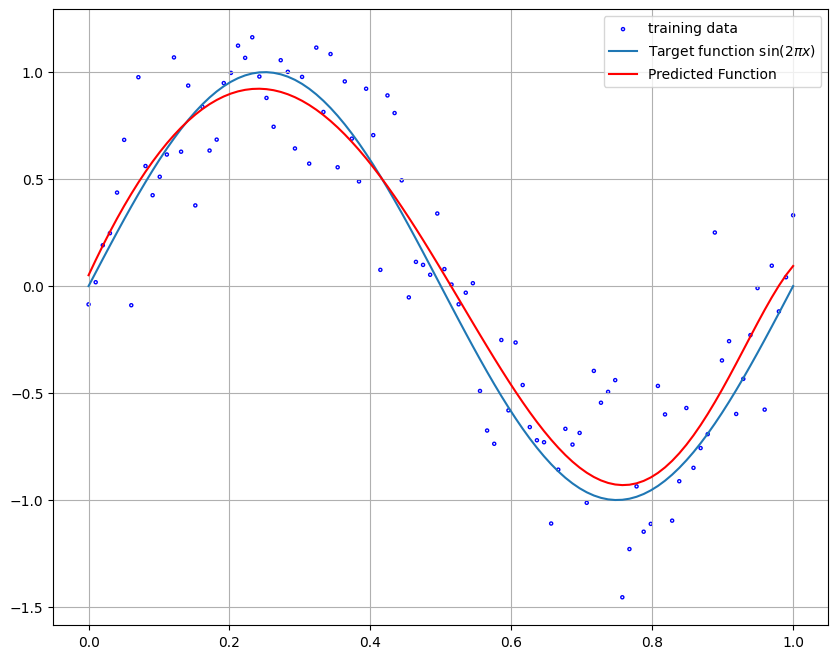

In [99]:
plt.figure(figsize=[10,8])
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=5, label="training data")
plt.plot(x_test, y_test, label="Target function $\sin(2\pi x)$")
plt.plot(x_test, y_pred, "-r", label="Predicted Function")
plt.grid()
plt.legend()
plt.show()

<Figure size 640x1000 with 0 Axes>

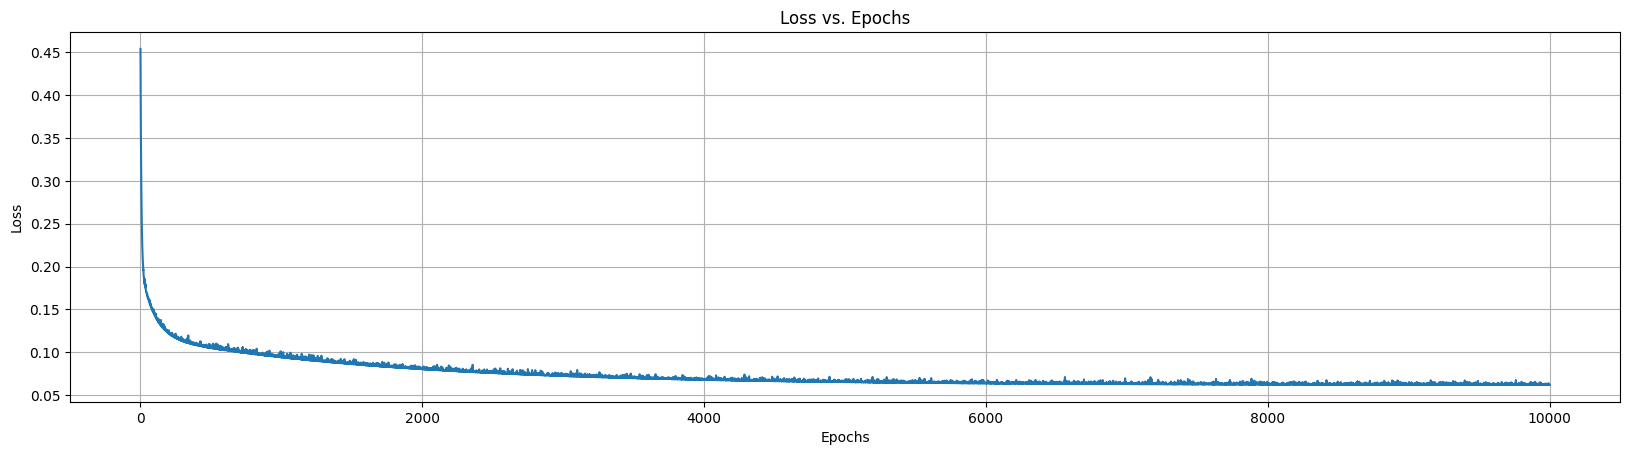

In [100]:
# prompt: make a plot with losses and epochs
losses, epochs = model.get_losses_epochs()
epochs = np.arange(len(losses))
plt.figure().set_figheight(10)
plt.figure().set_figwidth(20)
plt.plot(epochs, losses)
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")

plt.show()

In [101]:
weights, bias = model.get_weights_bias()

print("bias: " + str(bias))
print("weights: " + str(weights))

bias: 0.05086270393633578
weights: [  7.10999725 -13.50209276  -5.52147056   4.01544636   5.73211771
   6.82074053   2.1128201   -0.37666457  -6.34789324]
